In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/home/ankushraut/Downloads/Thirio')
plt.style.use('ggplot')

In [146]:
data = pd.read_csv('Dataset.csv')

In [147]:
data.head()

,Date,Day,Order Distance,Ticket Size
0,1/4/2011,Mon,2.62,4
1,1/4/2011,Mon,6.91,2
2,1/4/2011,Mon,4.90,1
3,1/4/2011,Mon,5.28,3
4,1/4/2011,Mon,4.99,2


In [148]:
data.describe()

,Order Distance,Ticket Size
count,2746.000000,2746.000000
mean,9.965812,11.787327
std,3.986931,5.466300
min,-0.110000,0.000000
25%,6.930000,7.000000
50%,9.700000,12.000000
75%,12.747500,16.000000
max,23.320000,26.000000


In [149]:
unique_dates = data.Date.unique()

In [150]:
uniqueness = []
for i in range(len(unique_dates)):
    uniqueness.append(unique_dates[i])

In [151]:
#splitting data on daily basis

mean_ticketSize = []
mean_orderDist = []
mean_window1 = []
mean_window2 = []
mean_window3 = []
mean_window4 = []
order_volume = []

for i in uniqueness:
    daily_data = data[data.Date == i]
    mean_ticketSize.append(np.mean(daily_data['Ticket Size']))
    mean_orderDist.append(np.mean(daily_data['Order Distance']))
    windows = np.array_split(daily_data, 4)
    mean_window1.append(np.mean(windows[0]['Ticket Size']))
    mean_window2.append(np.mean(windows[1]['Ticket Size']))
    mean_window3.append(np.mean(windows[2]['Ticket Size']))
    mean_window4.append(np.mean(windows[3]['Ticket Size']))
    order_volume.append(len(daily_data))

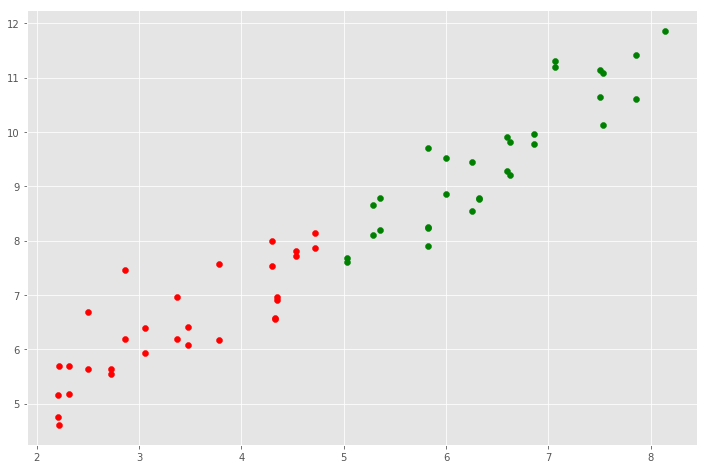

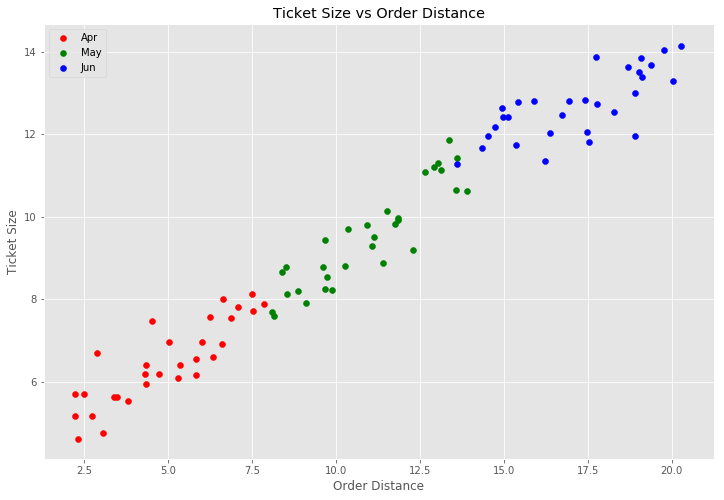

In [152]:
#plotting Ticket Size vs Order Distance

plt.figure(figsize = (12,8))
plt.scatter(mean_ticketSize[:30], mean_orderDist[:30], color = 'Red', label = 'Apr')
plt.scatter(mean_ticketSize[30:61], mean_orderDist[30:61], color = 'Green', label = 'May')
plt.scatter(mean_ticketSize[61:], mean_orderDist[61:], color = 'Blue', label = 'Jun')
plt.legend()
plt.title('Ticket Size vs Order Distance')
plt.xlabel('Order Distance')
plt.ylabel('Ticket Size')
plt.show()

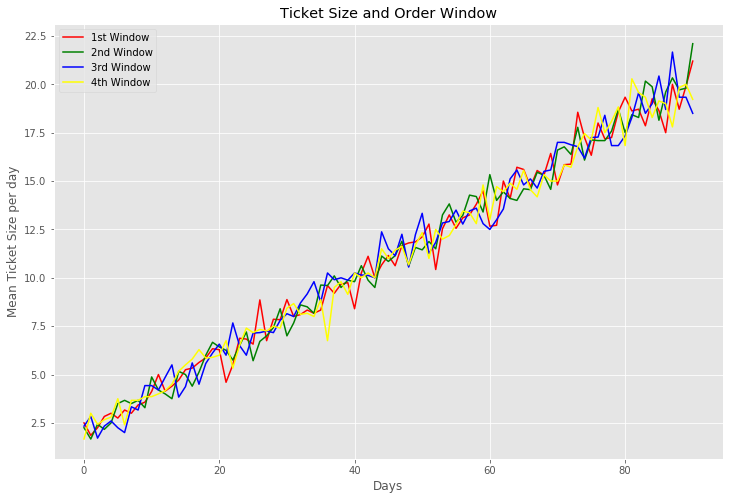

In [153]:
#plotting order window vs ticket size
plt.figure(figsize = (12,8))
plt.plot(mean_window1, color = 'Red', label = '1st Window')
plt.plot(mean_window2, color = 'Green', label = '2nd Window')
plt.plot(mean_window3, color = 'Blue', label = '3rd Window')
plt.plot(mean_window4, color = 'Yellow', label = '4th Window')
plt.title('Ticket Size and Order Window')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Mean Ticket Size per day')
plt.show()

In [154]:
#inference -> according to the data, there's no variation between order windows and 
#mean ticket size

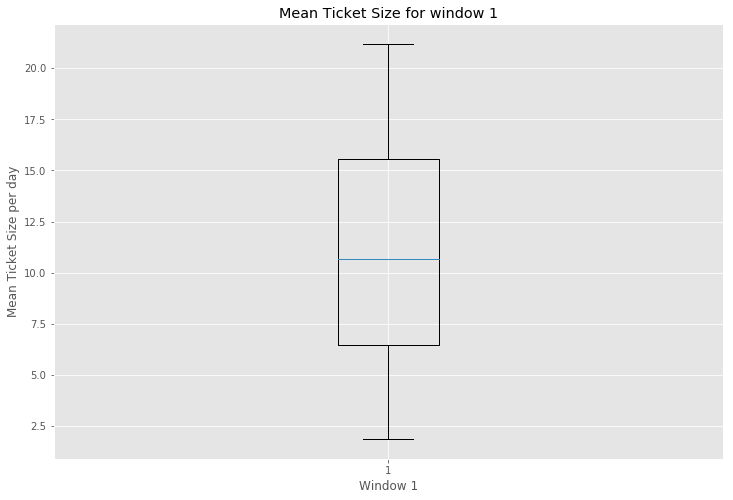

In [155]:
#corresponding boxplots
plt.figure(figsize = (12,8))
plt.boxplot(mean_window1)
plt.title('Mean Ticket Size for window 1')
plt.ylabel('Mean Ticket Size per day')
plt.xlabel('Window 1')
plt.show()

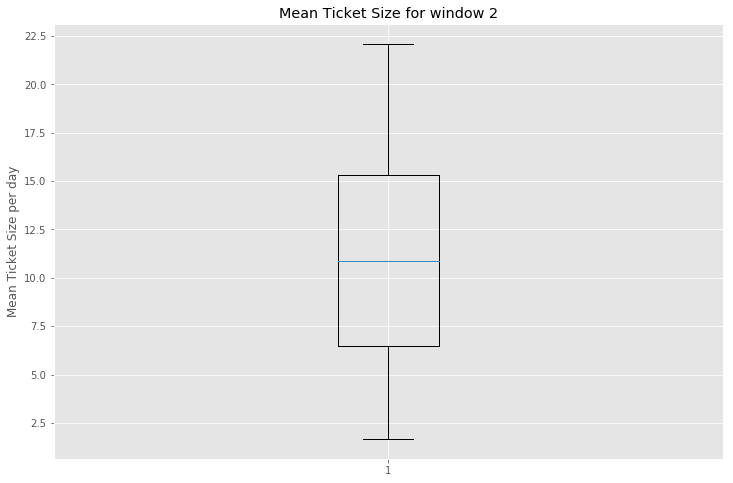

In [156]:
plt.figure(figsize = (12,8))
plt.boxplot(mean_window2)
plt.title('Mean Ticket Size for window 2')
plt.ylabel('Mean Ticket Size per day')
plt.show()

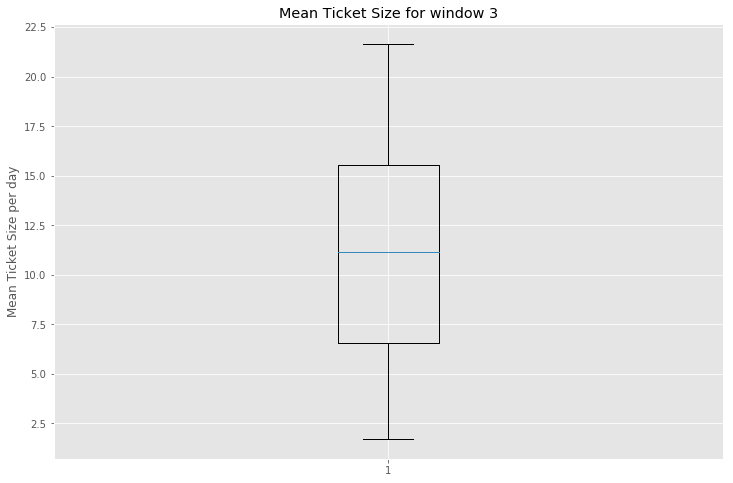

In [157]:
plt.figure(figsize = (12,8))
plt.boxplot(mean_window3)
plt.title('Mean Ticket Size for window 3')
plt.ylabel('Mean Ticket Size per day')
plt.show()

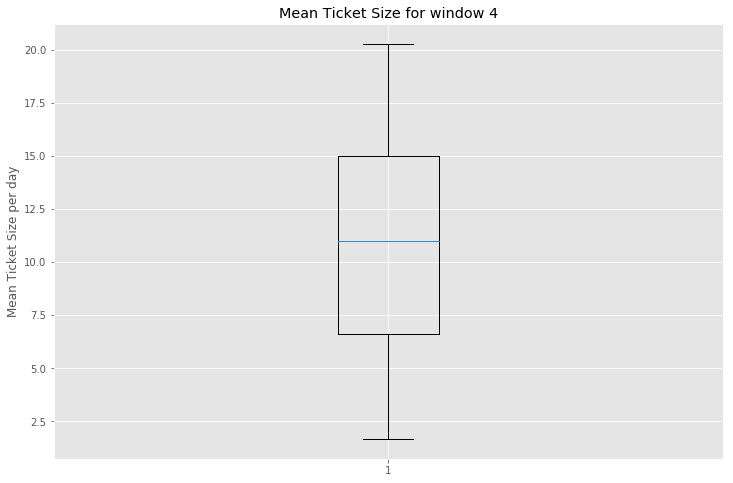

In [158]:
plt.figure(figsize = (12,8))
plt.boxplot(mean_window4)
plt.title('Mean Ticket Size for window 4')
plt.ylabel('Mean Ticket Size per day')
plt.show()

In [159]:
#plotting order volume and lags
orderVolume = pd.Series(order_volume)
weekLag = orderVolume.shift(-7)

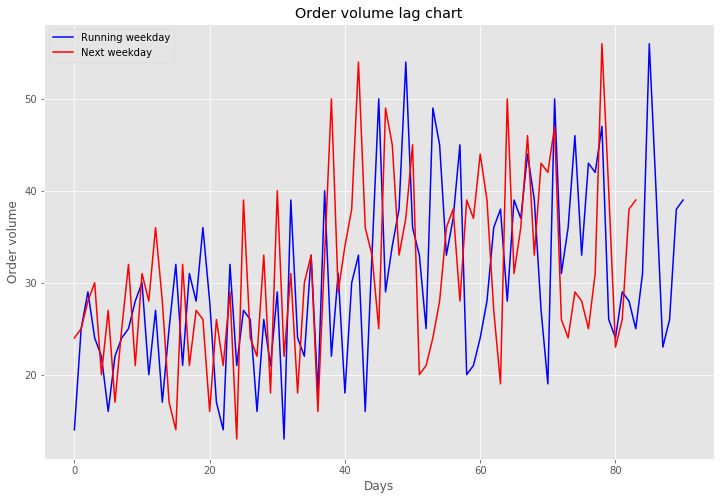

In [160]:
plt.figure(figsize = (12,8))
plt.plot(orderVolume, color = 'Blue', label = 'Running weekday')
plt.plot(weekLag, color = 'Red', label = 'Next weekday')
plt.title('Comparison b/w order volume on a day and its lag')
plt.xlabel('Days')
plt.ylabel('Order volume')
plt.legend()
plt.show()

In [161]:
#inference -> Generally if no. of tickets have been less on one day then those have been
# more on the corresponding day of the next week and vice versa

In [162]:
#plotting ticket size and lags
ticketSize = pd.Series(mean_ticketSize)
ticket_lag = ticketSize.shift(-7)

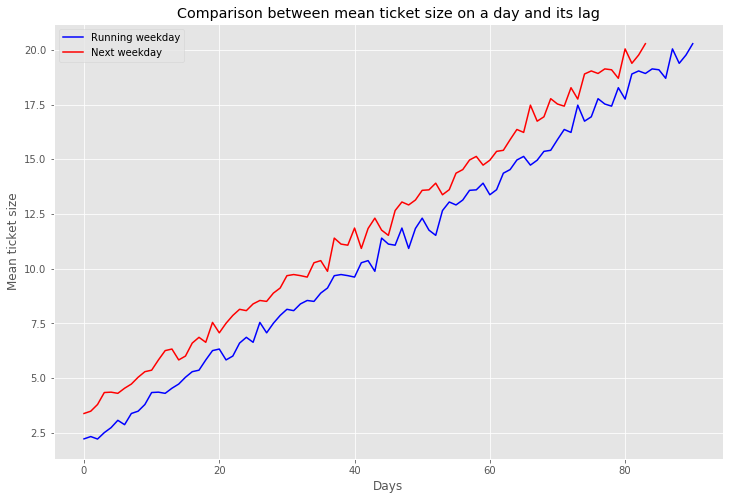

In [163]:
plt.figure(figsize = (12,8))
plt.plot(ticketSize, color = 'Blue', label = 'Running weekday')
plt.plot(ticket_lag, color = 'Red', label = 'Next weekday')
plt.title('Comparison between mean ticket size on a day and its lag')
plt.xlabel('Days')
plt.ylabel('Mean ticket size')
plt.legend()
plt.show()

In [164]:
#Inference -> Mean Ticket Size has constantly been increasing

In [ ]:
#trend line (projected growth)